In [244]:
import pandas as pd
import seaborn as sns

In [245]:
data_df = pd.read_csv("data_derived_v2.csv").iloc[:,1:]



/Users/pavankumarboinapalli/DSWorkspace/ProgramFiles/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [246]:
population_df = pd.read_csv("population_df.csv").iloc[:,1:]

In [247]:
data_df = pd.merge(data_df,population_df,how="left",left_on=["BOROUGH","Issuance_Date_Decade"],right_on=["Borough","census_decade"])

In [248]:
data_df.columns

Index(['BOROUGH', 'Bin_No', 'House_No', 'Street_Name', 'Job_No', 'Job_doc_No',
       'Job_Type', 'Self_Cert', 'Block', 'Lot', 'Community_Board', 'Zip_Code',
       'Bldg_Type', 'Residential', 'Work_Type', 'Permit_Status',
       'Filing_Status', 'Permit_Type', 'Permit_Sequence_No', 'Permit_Subtype',
       'Site_Fill', 'Filing_Date', 'Issuance_Date', 'Expiration_Date',
       'Job_Start_Date', 'Permittees_First_Name', 'Permittees_Last_Name',
       'Permittees_Business_Name', 'Permittees_Phone_No',
       'Permittees_License_Type', 'Permittees_License_No',
       'Act_as_Superintendent', 'Superintendent_First_&_Last_Name',
       'Superintendent_Business_Name', 'Owners_Business_Type', 'Non-Profit',
       'Owners_Business_Name', 'Owners_First_Name', 'Owners_Last_Name',
       'Owners_House_No', 'Owners_House_Street_Name', 'Owners_House_City',
       'Owners_House_State', 'Owners_House_Zip_Code', 'Owners_Phone_No',
       'DOBRunDate', 'PERMIT_SI_NO', 'LATITUDE', 'LONGITUDE',
       'C

In [249]:
data_df['Job_Type'].unique()

array(['A2', 'A3', 'A1', 'NB', 'DM', 'SG'], dtype=object)

In [250]:
data_to_test = data_df[data_df['Job_Type'].isin(['NB','DM','A1'])]

### Grouping based on Borough, Issuance_date_year, Residential status, job type

In [251]:
Building_res_trend = data_to_test.groupby(by=["BOROUGH","Issuance_Date_Year","Residential","Job_Type"]).size().reset_index().rename(columns={0:"Count"})

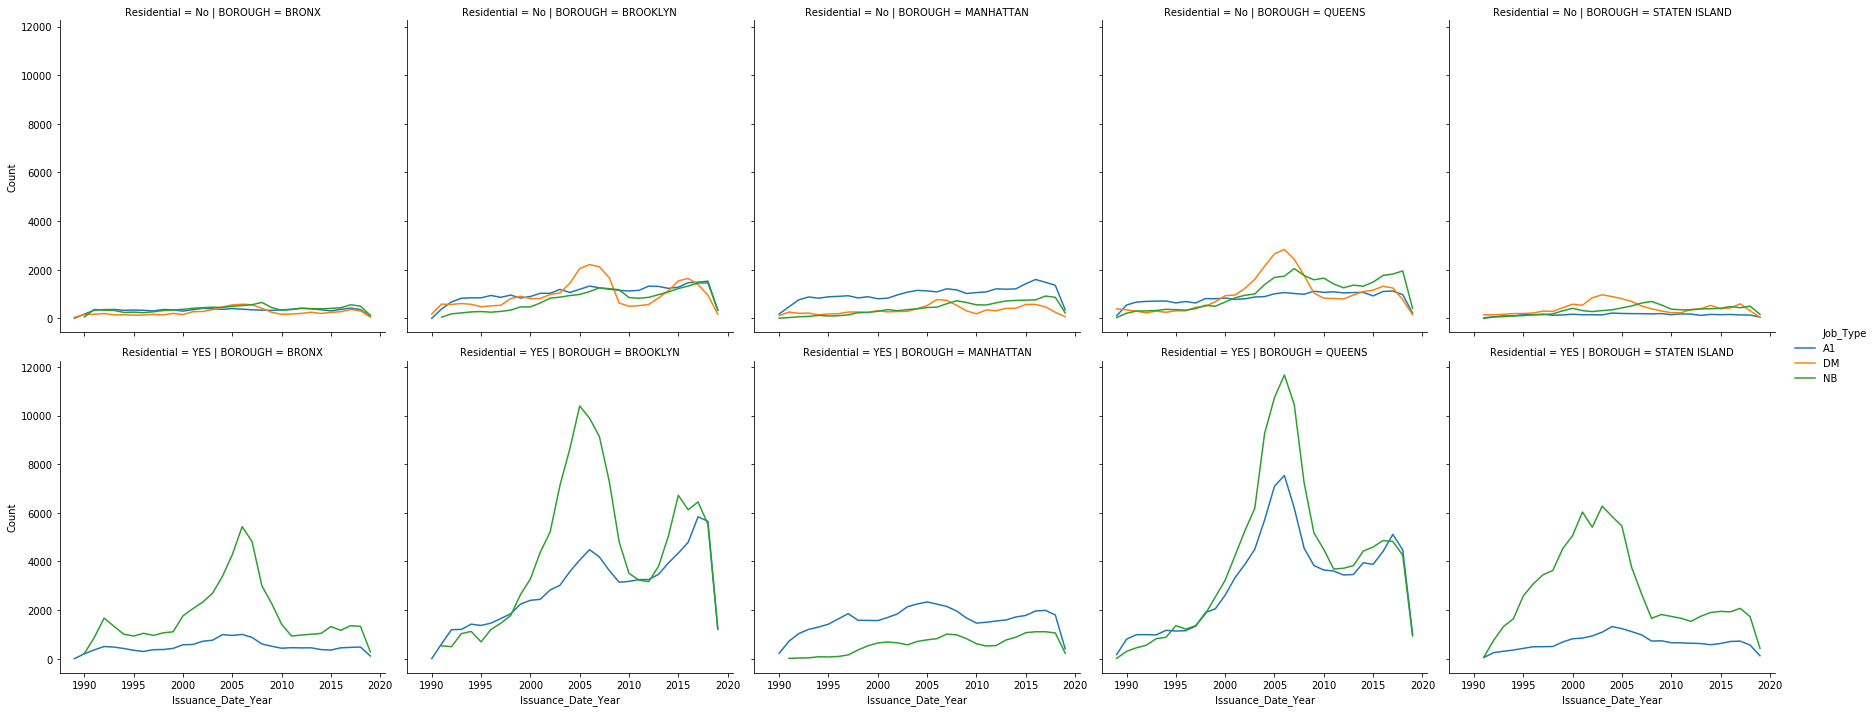

In [252]:
sns.relplot(row="Residential",x="Issuance_Date_Year",y="Count",kind="line",col="BOROUGH",hue="Job_Type",data=Building_res_trend)

###### We can observe that demmolitions is correlated with new building permits especially, residential ones.
###### There  is a sharp rise in demolition permits in 2008 recession year and in the same year residential new building/A1 type permits were on rise.
###### There is exception in borough Manhattan that recession didn't effect residential and non-residential buildings permits and both demolition and new bulding permits haven't changed their trend
###### We can also observe that Since major alterations(A1) and New Buildings(NB) permits are highly correlated since they both have same effect of increasing occupancy either by new building construction or alteration

In [253]:
Building_res_trend2 = Building_res_trend.groupby(["BOROUGH","Issuance_Date_Year","Residential","Job_Type"]).sum().reset_index()

In [254]:
# Building_res_trend2["NB_A1"] = Building_res_trend2["A1"] + Building_res_trend2["NB"]
# Building_res_trend2.drop(["A1","NB"],axis=1,inplace=True)
Building_res_trend2.replace(["No","YES"],["Non_Res_","Res_"],inplace=True)
Building_res_trend2["Res_Type_Job_Type"] = Building_res_trend2["Residential"]+Building_res_trend2["Job_Type"]
Building_res_trend2.drop(["Residential","Job_Type"],inplace=True,axis=1)

Building_res_trend2.head()

,BOROUGH,Issuance_Date_Year,Count,Res_Type_Job_Type
0,BRONX,1989,3,Non_Res_A1
1,BRONX,1989,42,Non_Res_DM
2,BRONX,1989,1,Res_A1
3,BRONX,1990,173,Non_Res_A1
4,BRONX,1990,155,Non_Res_DM


In [255]:
bor_year_job_res_type = pd.pivot_table(Building_res_trend2,index=["BOROUGH","Issuance_Date_Year"],columns="Res_Type_Job_Type",values="Count").reset_index().fillna(0)
bor_year_job_res_type = bor_year_job_res_type.T.reset_index(drop=True).T
bor_year_job_res_type.columns = ["BOROUGH","Issuance_Date_Year","Non_Res_A1","Non_Res_DM","Non_Res_NB","Res_A1","Res_NB"]

In [256]:
bor_year_job_res_type["Res_NB_A1"] = bor_year_job_res_type["Res_A1"] + bor_year_job_res_type["Res_NB"]
bor_year_job_res_type["Non_Res_NB_A1"] = bor_year_job_res_type["Non_Res_A1"] + bor_year_job_res_type["Non_Res_NB"]
bor_year_job_res_type.drop(["Res_A1","Res_NB","Non_Res_A1","Non_Res_NB"],axis=1,inplace=True)
bor_year_job_res_type.tail()

,BOROUGH,Issuance_Date_Year,Non_Res_DM,Res_NB_A1,Non_Res_NB_A1
146,STATEN ISLAND,2015,395,2572,564
147,STATEN ISLAND,2016,426,2638,645
148,STATEN ISLAND,2017,598,2797,578
149,STATEN ISLAND,2018,310,2291,638
150,STATEN ISLAND,2019,47,552,213


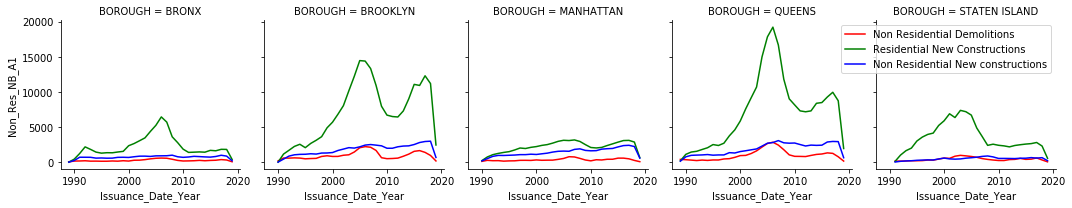

In [295]:
g = sns.FacetGrid(bor_year_job_res_type, col="BOROUGH")
g = g.map(plt.plot, "Issuance_Date_Year", "Non_Res_DM",color="red")
g = g.map(plt.plot, "Issuance_Date_Year", "Res_NB_A1",color="green")
g = g.map(plt.plot, "Issuance_Date_Year", "Non_Res_NB_A1",color="blue")
plt.legend(["Non Residential Demolitions","Residential New Constructions","Non Residential New constructions"])

In [ ]:
sns.relplot(row="Residential",x="Issuance_Date_Year",y="Count",kind="line",col="BOROUGH",hue="Res_Type_Job_Type",data=Building_res_trend2)

In [258]:
bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="BRONX",:].corr()

,Non_Res_DM,Res_NB_A1,Non_Res_NB_A1
Non_Res_DM,1.000000,0.925466,0.716379
Res_NB_A1,0.925466,1.000000,0.651718
Non_Res_NB_A1,0.716379,0.651718,1.000000


In [215]:
bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="QUEENS",:].corr()

,Non_Res_DM,Res_NB_A1,Non_Res_NB_A1
Non_Res_DM,1.000000,0.975505,0.721300
Res_NB_A1,0.975505,1.000000,0.829481
Non_Res_NB_A1,0.721300,0.829481,1.000000


In [216]:
bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="MANHATTAN",:].corr()

,Non_Res_DM,Res_NB_A1,Non_Res_NB_A1
Non_Res_DM,1.000000,0.778509,0.664048
Res_NB_A1,0.778509,1.000000,0.858530
Non_Res_NB_A1,0.664048,0.858530,1.000000


In [217]:
bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="BROOKLYN",:].corr()

,Non_Res_DM,Res_NB_A1,Non_Res_NB_A1
Non_Res_DM,1.000000,0.885836,0.684273
Res_NB_A1,0.885836,1.000000,0.887106
Non_Res_NB_A1,0.684273,0.887106,1.000000


In [218]:
bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="STATEN ISLAND",:].corr()

,Non_Res_DM,Res_NB_A1,Non_Res_NB_A1
Non_Res_DM,1.000000,0.843843,0.490835
Res_NB_A1,0.843843,1.000000,0.313817
Non_Res_NB_A1,0.490835,0.313817,1.000000


(array([ 1.,  0.,  0.,  0.,  1.,  1.,  7.,  4.,  2., 15.]),
 array([4.93447393, 5.24387206, 5.55327018, 5.8626683 , 6.17206643,
        6.48146455, 6.79086267, 7.10026079, 7.40965892, 7.71905704,
        8.02845516]),
 <a list of 10 Patch objects>)

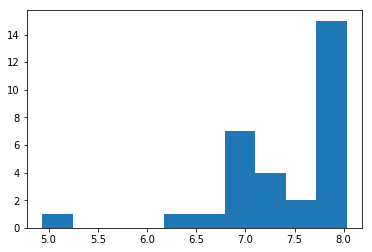

In [242]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(np.log(bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="QUEENS","Non_Res_NB_A1"]))

(array([9., 3., 5., 5., 3., 1., 1., 1., 1., 2.]),
 array([ 150. ,  418.2,  686.4,  954.6, 1222.8, 1491. , 1759.2, 2027.4,
        2295.6, 2563.8, 2832. ]),
 <a list of 10 Patch objects>)

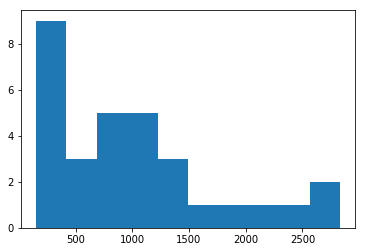

In [240]:
import matplotlib.pyplot as plt
plt.hist(bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="QUEENS","Non_Res_DM"])

(array([1., 0., 1., 2., 4., 8., 4., 4., 4., 2.]),
 array([4.2341065 , 4.47572376, 4.71734101, 4.95895827, 5.20057552,
        5.44219278, 5.68381003, 5.92542729, 6.16704454, 6.40866179,
        6.65027905]),
 <a list of 10 Patch objects>)

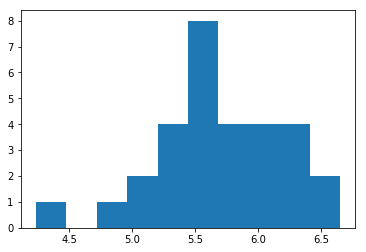

In [237]:
import matplotlib.pyplot as plt
plt.hist(np.log(bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="MANHATTAN","Non_Res_DM"]))

In [323]:
from sklearn.metrics import normalized_mutual_info_score,adjusted_mutual_info_score

In [354]:
normalized_mutual_info_score(bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="MANHATTAN","Non_Res_DM"],bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="MANHATTAN","Res_NB_A1"])

/Users/pavankumarboinapalli/DSWorkspace/ProgramFiles/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.993183600109919

In [351]:
normalized_mutual_info_score(bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="QUEENS","Non_Res_DM"],bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="QUEENS","Non_Res_NB_A1"])


/Users/pavankumarboinapalli/DSWorkspace/ProgramFiles/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


1.0

In [350]:
normalized_mutual_info_score(bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="STATEN ISLAND","Non_Res_DM"],bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="STATEN ISLAND","Res_NB_A1"])

/Users/pavankumarboinapalli/DSWorkspace/ProgramFiles/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


1.0

In [348]:
normalized_mutual_info_score(bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="BROOKLYN","Non_Res_DM"],bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="BROOKLYN","Res_NB_A1"])

/Users/pavankumarboinapalli/DSWorkspace/ProgramFiles/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.9863200936078507

In [346]:
normalized_mutual_info_score(bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="BRONX","Non_Res_DM"],bor_year_job_res_type.loc[bor_year_job_res_type["BOROUGH"]=="BRONX","Res_NB_A1"]) 

/Users/pavankumarboinapalli/DSWorkspace/ProgramFiles/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.9934674017223845